# Programming Exercise 2: Logistic Regression
## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision
### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import warnings 
warnings.filterwarnings('ignore')

%matplotlib notebook 
%run ./costFunction.ipynb
%run ./gradient.ipynb
%run ./sigmoid.ipynb
%run ./prepareData.ipynb
%run ./minimizeCost.ipynb
%run ./predictAdmission.ipynb

In [150]:
#  We start the exercise by first plotting the data to understand 
#  the problem we are working with.
data1 = pd.read_csv('ex2data1.txt', header=None, names=['Score1', 'Score2', 'Admitted'])

# Create a function to pepare the data.
# Get the number of features.
n = len(data1.columns)-1 # subtract 1 for the target column
x, y, theta = prepareData(data1, n)
print('Checking the dimensions of the matrices x, y, theta...')
print(x.shape, y.shape, theta.shape)

# show the data 
data1.head()

Checking the dimensions of the matrices x, y, theta...
(100, 3) (100, 1) (3, 1)


,Ones,Score1,Score2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


<IPython.core.display.Javascript object>


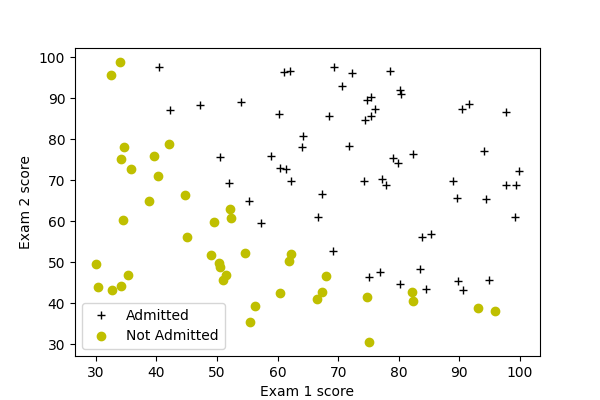

In [151]:
plt.figure(figsize=(6,4))
plt.plot(data1["Score1"][data1["Admitted"]==1],
         data1["Score2"][data1["Admitted"]==1], "k+",
         label = "Admitted")
plt.plot(data1["Score1"][data1["Admitted"]==0],
         data1["Score2"][data1["Admitted"]==0], "yo",
         label = "Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

### 1.2 Implementation
### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$h_{θ}(x) = g(θ^{T} x)$$
where function g is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1+e^{-z}} $$ 





<IPython.core.display.Javascript object>


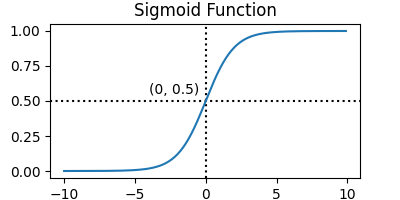

Evaluate sigmoid(0) = 0.5


In [152]:
g = sigmoid(x)

# Visualize the sigmoid function
plt.figure(figsize=(4, 2))

xx = np.arange(-10, 10, 0.1)
plt.axhline(y=0.5, c='black', ls=':')
plt.axvline(x=0, c='black', ls=':')
plt.annotate('(0, 0.5)', xy=(0, 0.5), xytext=(-4, 0.55))
plt.plot(xx, sigmoid(xx))
plt.title('Sigmoid Function')
plt.show()

print('Evaluate sigmoid(0) =', sigmoid(0))

### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.
Complete the code in costFunction to return the cost and gradient.
Recall that the cost function in logistic regression is
$$J(θ)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}\log(h_{θ}(x^{(i)})) - (1-y^{(i)})\log(1-h_{θ}(x^{(i)}))] $$

and the gradient of the cost is a vector of the same length as θ where the j th
element (for j = 0, 1, . . . , n) is defined as follows:
$$\frac{∂J(θ)}{∂θ_{j}}=\frac{1}{m}\sum_{i=1}^{m}(h_{θ}(x^{(i)}) - y^{(i)})x_{j}^{(i)}   $$
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression
have different definitions of $h_θ(x)$.


In [153]:
# Compute and display initial cost and gradient
cost = costFunction(theta, x, y)
grad = gradiend(theta,x,y)

print('Cost at initial theta (zeros): ',np.round(cost,3)  )
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
print( np.round(grad,4))
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros):  [0.693]
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
[[ -0.1   ]
 [-12.0092]
 [-11.2628]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [154]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2]).reshape(3,1)
cost = costFunction(test_theta, x, y)
grad = gradiend(test_theta,x,y)

print(f'Cost at test theta: {np.round(cost,3)}')
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
print(np.round( grad,3))
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta: [0.218]
Expected cost (approx): 0.218
Gradient at test theta: 
[[0.043]
 [2.566]
 [2.647]]
Expected gradients (approx):
 0.043
 2.566
 2.647



### 1.2.3 Learning parameters using fminunc
In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly.
This time, instead of taking gradient descent steps,a Python function called fmin from scipy will be used. This is the simplest way to minimize a function (unconstrained and constrained). For logistic regression, the objective is to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, fmin will be applied to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of $x$ and $y$ values). The following inputs will be passed to fmin:

- The initial values of the parameters to be optimized.
- A function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset ($x$, $y$ ).

In [155]:
theta = minimizeCost(costFunction, theta, x, y)
theta = theta.reshape(n+1,1)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


### 1.2.4 Plot the Decision Boundary

Plot the decision boundary on the training data, using the optimal $\theta$ values. The boundary is exactly at sigmoid(0) = 0.5:

$$\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}=0.5$$

or

$$\theta_0+\theta_1x_1+\theta_2x_2=0$$

and with the following conversion

$$x_2=-(\frac{\theta_0+\theta_1x_1}{\theta_2})$$

the boundary decision is graphically plotted.




<IPython.core.display.Javascript object>


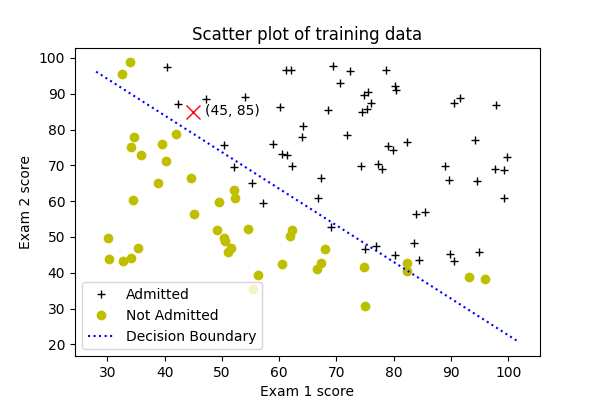

In [156]:
plot_x = np.array([np.min(x[:, 1]) - 2, np.max(x[:, 1] + 2)])
plot_y = -(theta[0] + theta[1] * plot_x) / theta[2]

plt.figure(figsize=(6, 4))
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Scatter plot of training data')
plt.plot(data1['Score1'][data1['Admitted']==1],
         data1['Score2'][data1['Admitted']==1], 'k+',
         label='Admitted')
plt.plot(data1['Score1'][data1['Admitted']==0],
         data1['Score2'][data1['Admitted']==0], 'yo',
         label='Not Admitted')

plt.plot(plot_x, plot_y, 'b:', label='Decision Boundary')
plt.plot(45, 85, 'rx', ms=10)
plt.annotate('(45, 85)', xy=(45, 85), xytext=(47, 84))

plt.legend()
plt.show()

### 1.2.5 Evaluating logistic regression

Use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, it is expected an admission probability of 0.776. 

Another way to evaluate the quality of the parameters is to see how well the learned model predicts on the training set. Create a predict function that will produce “1” or “0” predictions given a dataset and a learned parameter vector θ. Finally, report the training accuracy of the classifier by computing the percentage of examples it got correct.

In [157]:
#Predict probability for a student with score 45 on exam 1 
# and score 85 on exam 2 
prob = sigmoid(np.array([[1,45,85]]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of ', np.round( prob,4))
print('Expected value: 0.775 +/- 0.002\n\n')

# Compute accuracy on our training set
#p = sigmoid(np.dot(x,theta)) >= 0.5
p = predictAdmission(x,theta)
print("Train Accuracy: ", np.mean(p==y)*100 )
print("Expected accuracy (aproxx): 89.0")

For a student with scores 45 and 85, we predict an admission probability of  [[0.7763]]
Expected value: 0.775 +/- 0.002


Train Accuracy:  89.0
Expected accuracy (aproxx): 89.0
